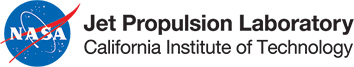

# **Delta-X Workshop**

## **Module 1: Above and Belowground biomass**
*Created by Alexandra Christensen (April 2022)*

*Jet Propulsion Laboratory, California Institute of Technology*

*© 2022 California Institute of Technology. Government sponsorship acknowledged.*


Final datasets are available on the ORNL DAAC:

> https://daac.ornl.gov/cgi-bin/dataset_lister.pl?p=41

Data citations:

> Castañeda-Moya, E., and E. Solohin. 2021. Delta-X: Aboveground Biomass and Necromass across Wetlands in the MRD, LA, USA, 2021. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/2000

> Castañeda-Moya, E., and E. Solohin. 2021. Delta-X: Belowground Biomass and Necromass across Wetlands in the MRD, LA, USA, 2021. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/1999




Authors:

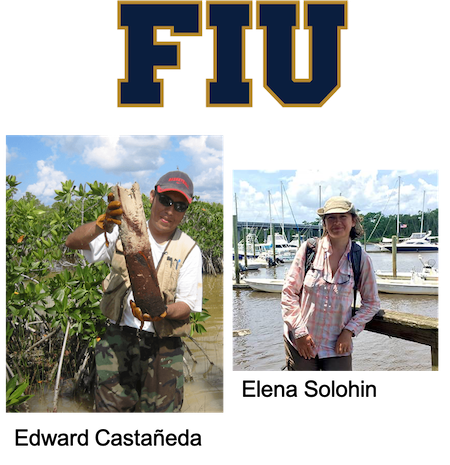

This module will introduce data from the spring field collection of above- and belowground biomass. These samples were collected from 7 different intensive sites throughout the Atchafalaya and Terrebonne basins. 

There are 4 sites in Atchafalaya , which is a sediment-rich basin, and 3 sites in Terrebonne, which is a sediment-poor basin. Vegetation, soil properties, elevation, inundation, all vary among these sites.


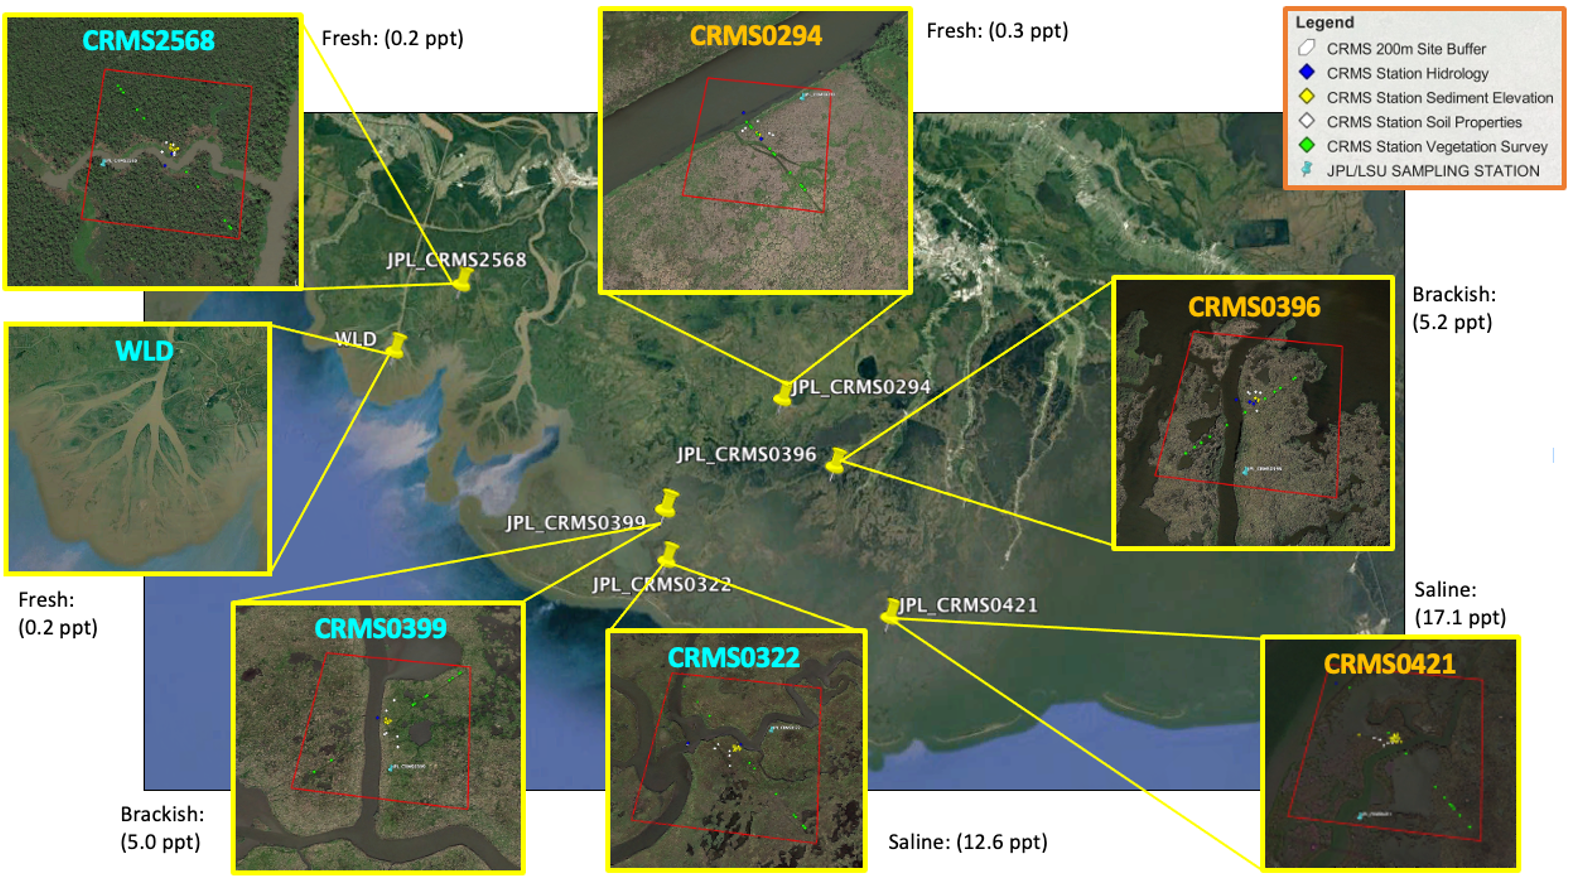

First, we need to install some packages and set our working directory. Make sure that you have added a shortcut to the Google Drive "DeltaX_Workshop_2022" on your drive. If not, you won't be able to access the data files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

input_dir = os.getcwd()
print(input_dir)

/content


**If you are not using Google Colab, don't run the next cell. It will change your input directory to the shared Google Drive folder, which you should only do if you're using Google Colab**

Second, we will grant access to your Google Drive account. If you have not done this before (or it's been a while), you will need to approve access. There will be 2 popups, make sure to allow both.

In [3]:
#For access to Google Drive files
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#For saving to Google Drive
from google.colab import drive

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
Gdrive = GoogleDrive(gauth)

drive.mount('/content/drive',force_remount=True)
input_dir = '/content/drive/My Drive/DeltaX_Workshop_2022/Tutorials/0_Field/Module1_Biomass/'


Mounted at /content/drive



# Let's start by loading the aboveground biomass file. 

This file contains information on biomass, carbon, nitrogen, and phosphorus for each sample. Take a minute to look at the data structure below. You can also open the file in Excel to get familiar with the parameters.


In [4]:
AGB_file = pd.read_csv(input_dir + "DeltaX_AGB_AGN_2000/data/DeltaX_Aboveground_Biomass_Necromass_Spring2021.csv")

AGB_file = AGB_file.replace(-9999,np.nan) #Replace -9999 with NAN

AGB_file.head() #Print the first 5 lines of the dataframe

,basin,campaign_id,date_collected,latitude,longitude,site_id,hydrogeomorphic_zone,sampling_station,quadrat_id,species,vegetation_class,total_dry_mass,total_carbon,total_nitrogen,total_phosphorus
0,Atchafalaya,Spring_2021,2021-03-29,29.51000,-91.44487,Mike Island,Supratidal,1,A,C. esculenta,AGB,341.1,297.2,33.4,4.45
1,Atchafalaya,Spring_2021,2021-03-29,29.50997,-91.44493,Mike Island,Supratidal,1,B,C. esculenta,AGB,136.3,179.8,21.6,4.75
2,Atchafalaya,Spring_2021,2021-03-29,29.50989,-91.44450,Mike Island,Supratidal,1,C,C. esculenta,AGB,60.8,340.6,42.7,5.49
3,Atchafalaya,Spring_2021,2021-03-29,29.50961,-91.44520,Mike Island,Supratidal,2,A,C. esculenta,AGB,241.2,312.0,33.3,3.83
4,Atchafalaya,Spring_2021,2021-03-29,29.50955,-91.44530,Mike Island,Supratidal,2,B,C. esculenta,AGB,173.2,378.2,46.4,5.32


In this dataset, multiple rows can represent the same vegetation plot. These rows are different plant species and can be living or dead material, all collected from the same plot.

Therefore, to get the total amount of living and dead biomass from each plot, we need to sum biomass, C, N, and P for each plot. To do this, we group the rows by site name, hydrogeomorphic zone, sampling station, quadrat, and vegetation class (live or dead). Then we sum the data (biomass, C, N, P) for each group.




In [7]:
AGB_file = AGB_file.groupby(['site_id','hydrogeomorphic_zone','sampling_station','quadrat_id','vegetation_class']).sum()
AGB_file = AGB_file.reset_index()


Now we have totals values for live (AGB) and dead (AGN) biomass values. For this module, we will focus only on the live portion. We will make a new variable (AGB_live) that contains only data from the live vegetation from each plot.


In [8]:
AGB_live = AGB_file[AGB_file['vegetation_class']=='AGB']



Now we find the average and standard deviation of the plot data for each hydrogeomorphic zone at each site. We do this using the function GroupBy, which aggregates all rows with the same site id and hydrogeomorphic zone.

We expect to see differences in hydrogeomorphic zones due to inundation frequency and duration and differences in soil properities.

In [9]:
agb_live_means = AGB_live.groupby(['site_id','hydrogeomorphic_zone'])[['total_dry_mass']].agg(np.nanmean)
agb_live_stds = AGB_live.groupby(['site_id','hydrogeomorphic_zone'])[['total_dry_mass']].agg(np.nanstd)
agb_live_count = AGB_live.groupby(['site_id','hydrogeomorphic_zone'])[['total_dry_mass']].agg(np.count_nonzero)

print(agb_live_means)

                                  total_dry_mass
site_id     hydrogeomorphic_zone                
CRMS0294    Intertidal                164.600000
            Supratidal                163.500000
CRMS0322    Intertidal                169.000000
            Supratidal                313.125000
CRMS0396    Intertidal                416.225000
            Supratidal                434.275000
CRMS0399    Intertidal                450.950000
            Supratidal                427.800000
CRMS0421    Intertidal                502.766667
            Supratidal                438.150000
Mike Island Supratidal                173.033333


We can now plot biomass values for each site and hydrogeomorphic zone to visually compare them.

There are endless plotting options in Python. Here, we will create very simple bar plots with error bars based on standard error (standard deviation/sqrt of sample #). Colors indicate the hydrogeomorphic zone.

Play around with the cell below to change plot features.

Everyone has preferences for plotting and there are many different ways to use Matplotlib features.

Text(0.5, 1.0, 'Average Live Aboveground Biomass in Spring 2021')

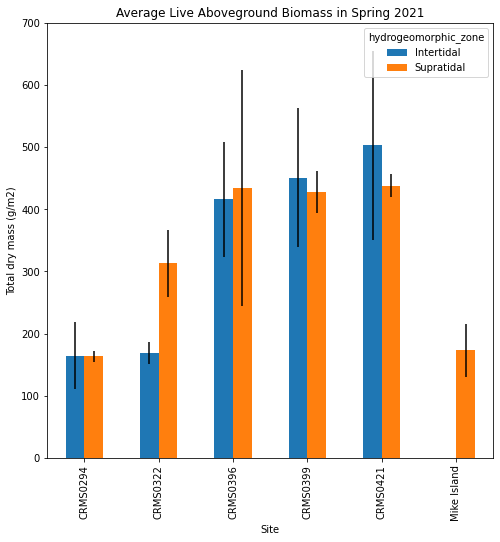

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
agb_live_means.unstack()['total_dry_mass'].plot(kind='bar', stacked=False,ax = ax,yerr = agb_live_stds.unstack()['total_dry_mass']/(np.sqrt(agb_live_count.unstack()['total_dry_mass'])))
ax.set(xlabel='Site', ylabel='Total dry mass (g/m2)',ylim=[0,700])
plt.title('Average Live Aboveground Biomass in Spring 2021')


# What trends do you notice in biomass between sites and hydrogeomorphic zones?



For the chemical analysis of vegetation, only one replicate was run, so we need to select only rows with data for total carbon, total nitrogen, and total phosphorus.



In [11]:
AGB_live_CNP = AGB_live[AGB_live['quadrat_id']=='A']

Again, we group by site and hydrogeomorphic zone to get averages.

In [12]:
agb_live_CNP_means = AGB_live_CNP.groupby(['site_id','hydrogeomorphic_zone'])[['total_carbon','total_nitrogen','total_phosphorus']].agg(np.nanmean)
agb_live_CNP_stds = AGB_live_CNP.groupby(['site_id','hydrogeomorphic_zone'])[['total_carbon','total_nitrogen','total_phosphorus']].agg(np.nanstd,ddof=0)
agb_live_CNP_count = AGB_live_CNP.groupby(['site_id','hydrogeomorphic_zone'])[['total_carbon','total_nitrogen','total_phosphorus']].agg(np.count_nonzero)

print(agb_live_CNP_means)

                                  total_carbon  total_nitrogen  \
site_id     hydrogeomorphic_zone                                 
CRMS0294    Intertidal                  818.10           43.70   
            Supratidal                  974.10           60.20   
CRMS0322    Intertidal                  602.85           22.25   
            Supratidal                  832.80           23.15   
CRMS0396    Intertidal                 1045.95           29.00   
            Supratidal                  637.35           18.40   
CRMS0399    Intertidal                  793.40           30.35   
            Supratidal                  804.15           26.65   
CRMS0421    Intertidal                  851.20           23.35   
            Supratidal                  413.20           11.50   
Mike Island Supratidal                  304.60           33.35   

                                  total_phosphorus  
site_id     hydrogeomorphic_zone                    
CRMS0294    Intertidal             

And we can make more plots.

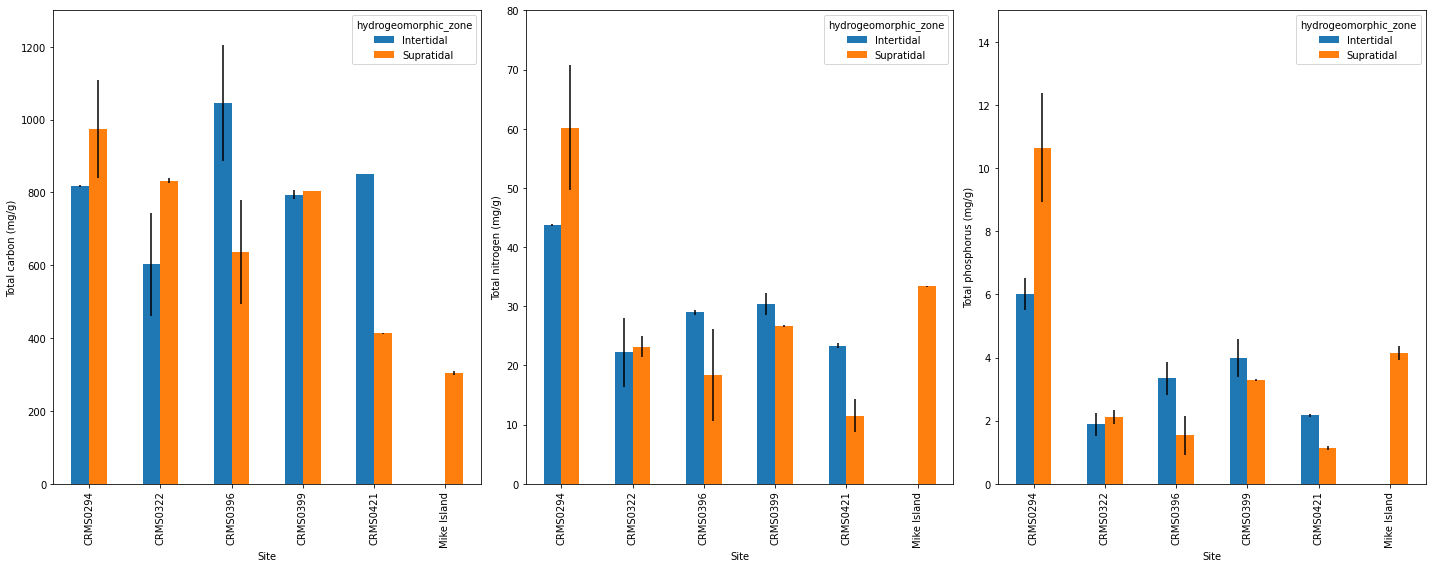

In [13]:
fig, [ax2,ax3,ax4] = plt.subplots(ncols=3,figsize=(20,8))

agb_live_CNP_means.unstack()['total_carbon'].plot(kind='bar', stacked=False,ax = ax2,yerr = agb_live_CNP_stds.unstack()['total_carbon']/(np.sqrt(agb_live_CNP_count.unstack()['total_carbon'])))
ax2.set(xlabel='Site', ylabel='Total carbon (mg/g)',ylim=[0,1300])

agb_live_CNP_means.unstack()['total_nitrogen'].plot(kind='bar', stacked=False,ax = ax3,yerr=agb_live_CNP_stds.unstack()['total_nitrogen']/(np.sqrt(agb_live_CNP_count.unstack()['total_nitrogen'])))
ax3.set(xlabel='Site', ylabel='Total nitrogen (mg/g)',ylim=[0,80])

agb_live_CNP_means.unstack()['total_phosphorus'].plot(kind='bar', stacked=False,ax = ax4,yerr = agb_live_CNP_stds.unstack()['total_phosphorus']/(np.sqrt(agb_live_CNP_count.unstack()['total_phosphorus'])))
ax4.set(xlabel='Site', ylabel='Total phosphorus (mg/g)',ylim=[0,15])

plt.tight_layout()

### What trends do you notice?





## Next we will look at the belowground biomass data.

In [14]:
BGB_file = pd.read_csv(input_dir + "DeltaX_BGB_BGN_1999/data/DeltaX_Belowground_Biomass_Necromass_Spring2021.csv")
BGB_file = BGB_file.replace(-9999,np.nan)



Again, we will only use the live portion of the root data.

In [15]:
BGB_live_file = BGB_file[BGB_file['root_class']=='Biomass']

For this dataset, multiple rows represent the same core, but different vertical sections. The cores were cut into 10cm intervals and processed individually. Therefore, we can use these intervals to plot depth profiles.


Let's plot a profile from two sites and compare them.

First, we will extract data for two sites: CRMS0396 intertidal and CRMS0421 intertidal.

In [16]:
CRMS0396_Int_Roots = BGB_live_file[(BGB_live_file['site']=='CRMS0396') & (BGB_live_file['hydrogeomorphic_zone']=='Intertidal')]
CRMS0421_Int_Roots = BGB_live_file[(BGB_live_file['site']=='CRMS0421') & (BGB_live_file['hydrogeomorphic_zone']=='Intertidal')]


And we will group by depth interval and take the average

In [17]:

CRMS0396_Int_Roots_means = CRMS0396_Int_Roots.groupby(['depth_interval'])[['root_biomass']].agg(np.nanmean)
CRMS0421_Int_Roots_means = CRMS0421_Int_Roots.groupby(['depth_interval'])[['root_biomass']].agg(np.nanmean)

Now let's plot those profiles

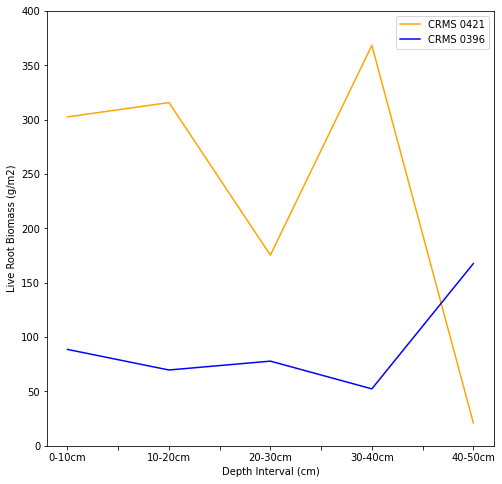

In [18]:
fig, ax = plt.subplots(figsize=(8,8))

CRMS0421_Int_Roots_means.unstack()['root_biomass'].plot(y='depth_interval',kind='line', stacked=False,ax = ax,c='orange')
CRMS0396_Int_Roots_means.unstack()['root_biomass'].plot(y='depth_interval',kind='line', stacked=False,ax = ax,c='blue')
ax.set(xlabel='Depth Interval (cm)', ylabel='Live Root Mass (g/m2)',ylim=[0,400])
plt.legend(('CRMS 0421','CRMS 0396'))


## What trends do you notice in the vertical profiles of these cores?

We can also at total root biomass (0-50cm) and compare betwen site and hydrogeomorphic zone.
To do this, we must first sum the biomass in all depth intervals of each core.

In [19]:
BGB_live_file = BGB_live_file.groupby(['site','hydrogeomorphic_zone','sampling_station','core_id']).sum()
BGB_live_file = BGB_live_file.reset_index()


We can now compare total live root biomass between all sites and hydrogeomorphic zones.

In [20]:
bgb_live_means = BGB_live_file.groupby(['site','hydrogeomorphic_zone'])[['root_biomass']].agg(np.mean)
bgb_live_stds = BGB_live_file.groupby(['site','hydrogeomorphic_zone'])[['root_biomass']].agg(np.std)
bgb_live_count = BGB_live_file.groupby(['site','hydrogeomorphic_zone'])[['root_biomass']].agg(np.count_nonzero)

print(bgb_live_means)

                                  root_biomass
site        hydrogeomorphic_zone              
CRMS0294    Intertidal              243.350000
            Supratidal              168.733333
CRMS0322    Intertidal             1707.300000
            Supratidal             1275.875000
CRMS0396    Intertidal              456.200000
            Supratidal              609.575000
CRMS0399    Intertidal              847.125000
            Supratidal              983.825000
CRMS0421    Intertidal              939.175000
            Supratidal             1020.700000
Mike Island Supratidal              445.400000


[(0.0, 2100.0), Text(0, 0.5, 'Root mass (g/m2)'), Text(0.5, 0, 'Site')]

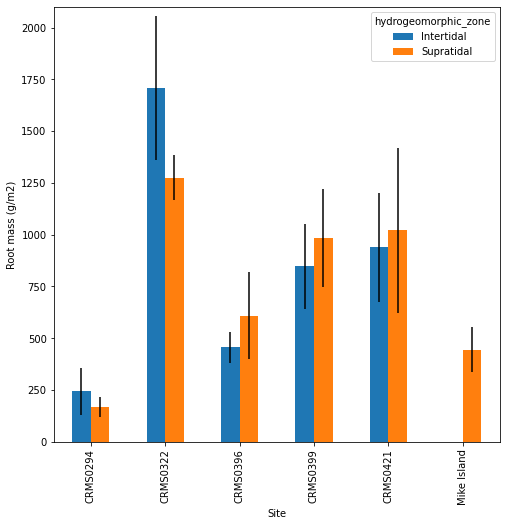

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
bgb_live_means.unstack()['root_biomass'].plot(kind='bar', stacked=False,ax = ax,yerr = bgb_live_stds.unstack()['root_biomass']/(np.sqrt(bgb_live_count.unstack()['root_biomass'])))
ax.set(xlabel='Site', ylabel='Live Root Mass (g/m2)',ylim=[0,2100])
plt.set_title('Live Belowground Biomass in Spring 2021')

## What trends do you notice in the root biomass data?


Our last step is to calculate the root/shoot ratio. 

We will use the average live aboveground biomass and average live root biomass from each site/hydrogeomorphic zone.

First, we merge the agb_live_means and bgb_live_means into one dataframe

In [24]:
root_shoot_ratio = pd.merge(agb_live_means.reset_index(), bgb_live_means.reset_index(),  how='left', left_on=['site_id','hydrogeomorphic_zone'],right_on=['site','hydrogeomorphic_zone'])


Then we create a new column and calculate the ratio of BGB:AGB

In [25]:
root_shoot_ratio['Ratio'] = root_shoot_ratio['root_biomass']/root_shoot_ratio['total_dry_mass']
print(root_shoot_ratio)



        site_id hydrogeomorphic_zone  total_dry_mass         site  \
0      CRMS0294           Intertidal      164.600000     CRMS0294   
1      CRMS0294           Supratidal      163.500000     CRMS0294   
2      CRMS0322           Intertidal      169.000000     CRMS0322   
3      CRMS0322           Supratidal      313.125000     CRMS0322   
4      CRMS0396           Intertidal      416.225000     CRMS0396   
5      CRMS0396           Supratidal      434.275000     CRMS0396   
6      CRMS0399           Intertidal      450.950000     CRMS0399   
7      CRMS0399           Supratidal      427.800000     CRMS0399   
8      CRMS0421           Intertidal      502.766667     CRMS0421   
9      CRMS0421           Supratidal      438.150000     CRMS0421   
10  Mike Island           Supratidal      173.033333  Mike Island   

    root_biomass      Ratio  
0     243.350000   1.478433  
1     168.733333   1.032008  
2    1707.300000  10.102367  
3    1275.875000   4.074651  
4     456.200000   1.

Again, we can plot these values to compare among site and hydrogeomorphic zone

[(0.0, 11.0), Text(0, 0.5, 'Root:Shoot'), Text(0.5, 0, 'Site')]

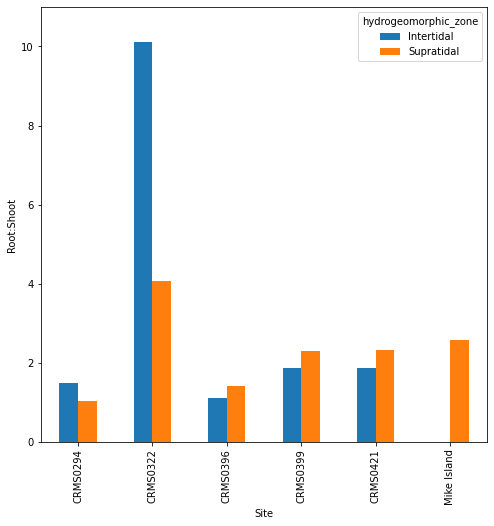

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
ratio_means = root_shoot_ratio.groupby(['site_id','hydrogeomorphic_zone'])[['Ratio']].agg(np.mean)
ratio_means['Ratio'].unstack().plot(kind='bar', stacked=False,ax = ax)
ax.set(xlabel='Site', ylabel='Root:Shoot',ylim=[0,11])


## What trends do you notice?

There are many things you can test with these variables. You're encouraged to play around with these data, which can also be combined with other site data.

